# Clean data

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import math
import copy
from gamspy import (
    Container,Set,Alias,Parameter,Variable,Equation,Model,Problem,Sense,Options,
    Domain,Number,Sum,Product,Smax,Smin,Ord,Card,SpecialValues,
)
import gamspy.math as gpm
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
raw_data = pd.read_csv("qualite-de-lair-france.csv", delimiter=";")
raw_data.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,FR,GONFREVILLE-L'ORCHER,Gonfreville l Orcher,"49.50273000006004, 0.23248599967153102",SO2,eea,µg/m³,1.7,2024-10-23T02:00:00-05:00,France
1,FR,GAP,GAP COMMANDERIE,"44.55519500016715, 6.073015000180452",PM2.5,eea,µg/m³,8.4,2024-10-21T20:00:00-05:00,France
2,FR,MIRAMONT-DE-COMMINGES,MIRAMONT,"43.093612999884385, 0.743611000284973",SO2,eea,µg/m³,1.0,2024-10-23T02:00:00-05:00,France
3,FR,FORT-DE-FRANCE,Fort-de-France - Hôtel de ville,"14.607443999603946, -61.0697800003841",PM10,eea,µg/m³,12.9,2024-10-23T02:00:00-05:00,France
4,FR,MUNCHHAUSEN,Nord-Est Alsace,"48.91935699988632, 8.158457999835527",NO2,eea,µg/m³,19.6,2024-10-23T02:00:00-05:00,France


In [ ]:
raw_data[(raw_data.City == "Bouches-du-Rhône") & (raw_data["Pollutant"] == "SO2")]

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
174,FR,Bouches-du-Rhône,FR02001,"43.4858630407889, 5.17194245048405",SO2,EEA France,µg/m³,1.6,2020-05-03T04:00:00-05:00,France
349,FR,Bouches-du-Rhône,FR02020,"43.510559975903, 5.21972384044637",SO2,EEA France,µg/m³,0.0,2020-05-15T02:00:00-05:00,France
542,FR,Bouches-du-Rhône,FR02009,"43.4002906312612, 4.79639276280504",SO2,EEA France,µg/m³,1.9,2022-01-06T20:00:00-06:00,France
622,FR,Bouches-du-Rhône,FR02013,"43.4588738424815, 4.93416737793045",SO2,EEA France,µg/m³,1.1,2024-01-29T11:00:00-06:00,France
790,FR,Bouches-du-Rhône,FR03043,"43.3060996358468, 5.3957936361337895",SO2,EEA France,µg/m³,0.5,2024-01-29T11:00:00-06:00,France
794,FR,Bouches-du-Rhône,FR02029,"43.3995726680061, 5.11471976688564",SO2,EEA France,µg/m³,2.1,2022-01-06T19:00:00-06:00,France
1099,FR,Bouches-du-Rhône,FR02028,"43.3859950341426, 5.02694538047432",SO2,EEA France,µg/m³,1.7,2024-01-29T11:00:00-06:00,France
1660,FR,Bouches-du-Rhône,FR02011,"43.4374825389185, 4.94360867156655",SO2,EEA France,µg/m³,0.9,2024-01-29T10:00:00-06:00,France
1661,FR,Bouches-du-Rhône,FR03030,"43.453461514164, 5.4671019033872",SO2,EEA France,µg/m³,0.9,2019-12-23T03:00:00-06:00,France
2255,FR,Bouches-du-Rhône,FR02006,"43.361116575414, 5.0247175585697",SO2,EEA France,µg/m³,-0.2,2024-01-29T08:00:00-06:00,France


In [ ]:
print(raw_data["Unit"].unique())
print(raw_data["Source Name"].unique())
print(raw_data["Country Label"].unique())

['µg/m³' 'particles/cm³' '%' 'c']
['eea' 'airgradient' 'EEA France' 'EEA Andorra']
['France']


## Drop columns and NAs

In [ ]:
df = raw_data.drop(columns=["Country Code", "Coordinates", "Location", "Last Updated", "Country Label"], errors='ignore')
df

,City,Pollutant,Source Name,Unit,Value
0,GONFREVILLE-L'ORCHER,SO2,eea,µg/m³,1.70
1,GAP,PM2.5,eea,µg/m³,8.40
2,MIRAMONT-DE-COMMINGES,SO2,eea,µg/m³,1.00
3,FORT-DE-FRANCE,PM10,eea,µg/m³,12.90
4,MUNCHHAUSEN,NO2,eea,µg/m³,19.60
...,...,...,...,...,...
2613,NaN,O3,EEA France,µg/m³,117.18
2614,NaN,O3,EEA France,µg/m³,84.75
2615,NaN,NO2,EEA France,µg/m³,5.18
2616,NaN,PM10,EEA France,µg/m³,10.40


In [ ]:
df = df.dropna()
df

,City,Pollutant,Source Name,Unit,Value
0,GONFREVILLE-L'ORCHER,SO2,eea,µg/m³,1.70
1,GAP,PM2.5,eea,µg/m³,8.40
2,MIRAMONT-DE-COMMINGES,SO2,eea,µg/m³,1.00
3,FORT-DE-FRANCE,PM10,eea,µg/m³,12.90
4,MUNCHHAUSEN,NO2,eea,µg/m³,19.60
...,...,...,...,...,...
2606,Bouches-du-Rhône,SO2,EEA France,µg/m³,1.90
2607,Bouches-du-Rhône,PM10,EEA France,µg/m³,17.20
2608,Nord,PM2.5,EEA France,µg/m³,2.65
2609,Reunion,PM2.5,EEA France,µg/m³,5.00


In [ ]:
print(df["Unit"].unique())

['µg/m³']


In [ ]:
df = df.drop(columns=["Unit"], errors='ignore')
df

,City,Pollutant,Source Name,Value
0,GONFREVILLE-L'ORCHER,SO2,eea,1.70
1,GAP,PM2.5,eea,8.40
2,MIRAMONT-DE-COMMINGES,SO2,eea,1.00
3,FORT-DE-FRANCE,PM10,eea,12.90
4,MUNCHHAUSEN,NO2,eea,19.60
...,...,...,...,...
2606,Bouches-du-Rhône,SO2,EEA France,1.90
2607,Bouches-du-Rhône,PM10,EEA France,17.20
2608,Nord,PM2.5,EEA France,2.65
2609,Reunion,PM2.5,EEA France,5.00


## Filter out the data with value greater or equal to 0

In [ ]:
df = df[df["Value"] >= 0]
df

,City,Pollutant,Source Name,Value
0,GONFREVILLE-L'ORCHER,SO2,eea,1.70
1,GAP,PM2.5,eea,8.40
2,MIRAMONT-DE-COMMINGES,SO2,eea,1.00
3,FORT-DE-FRANCE,PM10,eea,12.90
4,MUNCHHAUSEN,NO2,eea,19.60
...,...,...,...,...
2606,Bouches-du-Rhône,SO2,EEA France,1.90
2607,Bouches-du-Rhône,PM10,EEA France,17.20
2608,Nord,PM2.5,EEA France,2.65
2609,Reunion,PM2.5,EEA France,5.00


## Take average over cities and pollutant types

In [ ]:
df = df.groupby(["City", "Pollutant"], as_index=False)["Value"].mean()
df

,City,Pollutant,Value
0,AGDE,NO,0.40
1,AGDE,NO2,8.20
2,AGDE,O3,18.40
3,AIR PAYS DE LA LOIRE,NO,2.50
4,AIR PAYS DE LA LOIRE,NO2,1.70
...,...,...,...
1628,ÉVREUX,PM10,12.40
1629,ÉVREUX,PM2.5,6.60
1630,ÉVREUX,SO2,5.25
1631,ÉVRY-COURCOURONNES,NO,13.40


## Only include SO2, NOx and PMs

In [ ]:
df = df[~df["Pollutant"].isin(["CO", "O3"])]
df

,City,Pollutant,Value
0,AGDE,NO,0.40
1,AGDE,NO2,8.20
3,AIR PAYS DE LA LOIRE,NO,2.50
4,AIR PAYS DE LA LOIRE,NO2,1.70
5,AIR PAYS DE LA LOIRE,PM10,16.20
...,...,...,...
1628,ÉVREUX,PM10,12.40
1629,ÉVREUX,PM2.5,6.60
1630,ÉVREUX,SO2,5.25
1631,ÉVRY-COURCOURONNES,NO,13.40


<ipython-input-25-1c819030c580>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Value', y='Pollutant', inner='box', palette='Dark2')


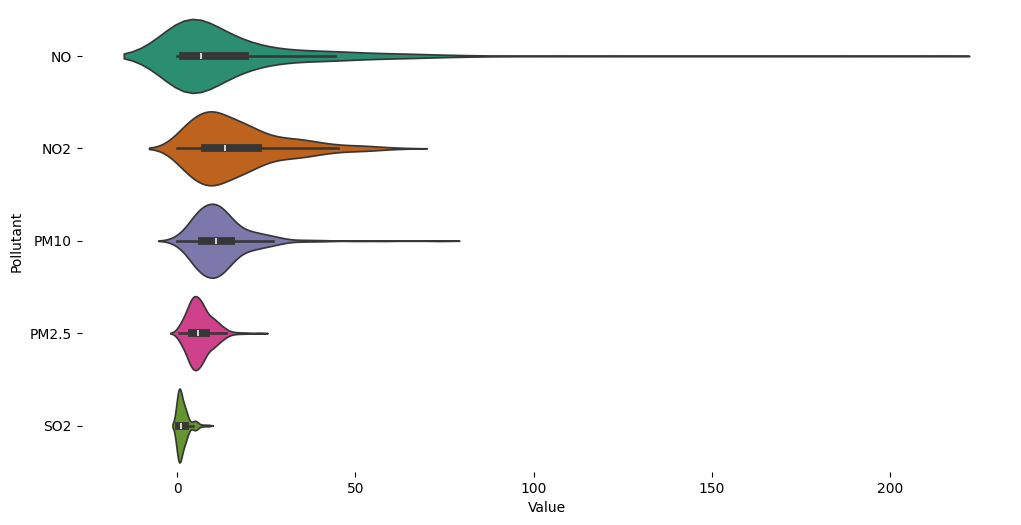

In [ ]:

figsize = (12, 1.2 * len(df['Pollutant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Value', y='Pollutant', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Replace with NOx and PMx

In [ ]:
pollutant_mapping = {
    "NO": "NOx",
    "NO2": "NOx",
    "PM10": "PMx",
    "PM2.5": "PMx"
}

df["Pollutant"] = df["Pollutant"].replace(pollutant_mapping)

# Group by City and Pollutant and sum values
df = df.groupby(["City", "Pollutant"], as_index=False)["Value"].sum()


<ipython-input-26-ad85bc3d5a02>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pollutant"] = df["Pollutant"].replace(pollutant_mapping)


<ipython-input-27-329da5d33c93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Value', y='Pollutant', inner='box', palette='Dark2')


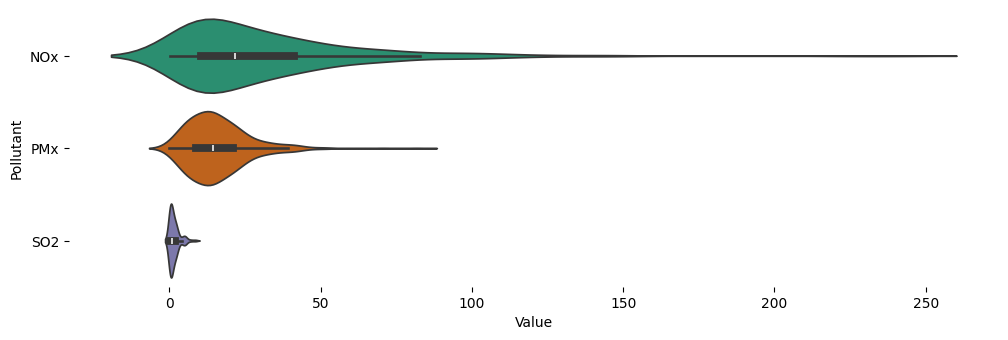

In [ ]:
figsize = (12, 1.2 * len(df['Pollutant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Value', y='Pollutant', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Create dataframe that contains the cotroling methods

In [ ]:
Controlling_data = {
    "Control Equipment": [
        "Scrubbers-wet (SW)", "Bag house (BH)", "Chemical suppressant-Magnesium chloride (CS)",
        "Water suppressant (WS)", "Capping (Cp)",
        "Selective catalytic reduction (SCR)", "Non-selective catalytic reduction (NSCR)",
        "Flue gas recirculation (FGR)",
        "Dry flue gas desulfurization (FGD-dry)", "Wet flue gas desulfurization (FGD-wet)"
    ],
    "Pollutant types": ["PMx", "PMx", "PMx", "PMx", "PMx", "NOx", "NOx", "NOx", "SO2", "SO2"],
    "Removal Efficiency (%)": [96, 95, 85, 65, 75, 85, 65, 60, 94, 98],
    "Direct Cost (DC)": [
        159, 56, 0.37, 0.20, 5.6,
        8.490, 3.130, 1.370, 6300, 7760
    ],
    "Indirect Cost (IC)": [
        103, 29, 0.12, 0.15, 2.1,
        3.540, 2.545, 0.450, 1250, 5600
    ],
}

# Create the DataFrame
methods = pd.DataFrame(Controlling_data)
methods

,Control Equipment,Pollutant types,Removal Efficiency (%),Direct Cost (DC),Indirect Cost (IC)
0,Scrubbers-wet (SW),PMx,96,159.00,103.000
1,Bag house (BH),PMx,95,56.00,29.000
2,Chemical suppressant-Magnesium chloride (CS),PMx,85,0.37,0.120
3,Water suppressant (WS),PMx,65,0.20,0.150
4,Capping (Cp),PMx,75,5.60,2.100
5,Selective catalytic reduction (SCR),NOx,85,8.49,3.540
6,Non-selective catalytic reduction (NSCR),NOx,65,3.13,2.545
7,Flue gas recirculation (FGR),NOx,60,1.37,0.450
8,Dry flue gas desulfurization (FGD-dry),SO2,94,6300.00,1250.000
9,Wet flue gas desulfurization (FGD-wet),SO2,98,7760.00,5600.000


In [ ]:
methods['Total Cost'] = methods['Direct Cost (DC)'] + methods['Indirect Cost (IC)']

# Convert the relevant columns into a list of lists
cost_list = methods[['Control Equipment', 'Pollutant types', 'Total Cost']].values.tolist()

efficiency_list = methods[['Control Equipment', 'Pollutant types', 'Removal Efficiency (%)']].values.tolist()

# Write the data into gdx

In [ ]:
City = df["City"].unique().tolist()
data_list = df[['City', 'Pollutant', 'Value']].values.tolist()

m = Container()
i = Set(m,'i',description='city',records=City)
pollutant = Set(m,'pollutant',description='pollutant types',records=['NOx', 'PMx', 'SO2'])
equip = Set(m,'equip',description='equipments',records = [
        "Scrubbers-wet (SW)", "Bag house (BH)", "Chemical suppressant-Magnesium chloride (CS)",
        "Water suppressant (WS)", "Capping (Cp)",
        "Selective catalytic reduction (SCR)", "Non-selective catalytic reduction (NSCR)",
        "Flue gas recirculation (FGR)",
        "Dry flue gas desulfurization (FGD-dry)", "Wet flue gas desulfurization (FGD-wet)"
    ])

city_pollutant_value = Parameter(m,'city_pollutant_value',[i, pollutant],description="pollutant value",records=data_list)
cost = Parameter(m,'cost',[equip, pollutant],description="cost of equips",records=cost_list)
efficiency = Parameter(m,'efficiency',[equip, pollutant],description="efficiency of equips",records=efficiency_list)
m.write('France.gdx',compress=False)
